# Técnicas estadísticas

## Aplicación en regresión lineal

### Elaborado por: Dr. Roberto Bárcenas


La estructura del modelo de regresión lineal es $y=\beta_{0}+\beta_{1}x_1 +\epsilon$, donde los coeficientes $\beta_{0}$ y $\beta_{1}$, son parámetros del modelo denominados coeficientes de regresión.  Podemos usar la información proporcionada por una muestra para hallar estimadores (${\hat{\beta}_j}$) de estos.

Esto significa que, el modelo generado, es una estimación de la relación poblacional a partir de la relación que se observa en la muestra y, por lo tanto, está sujeta a variaciones. Para cada uno de los coeficientes de la ecuación de regresión lineal ($\beta_j$) se puede realizar una prueba de hipótesis para evaluar su significancia. La primera estadística  empleada para validar su significancia proviene de la prueba $t$.

**Hipótesis**

$H_0: \beta_j = 0$ vs $H_{1}: \beta_j \neq 0$


Bajo $H_0$, el predictor  $x_j$  no contribuye al modelo, en presencia del resto de predictores. En el caso de regresión lineal simple, se puede interpretar también como que no existe relación lineal entre ambas variables por lo que (la ordenada) y la  pendiente del modelo son cero.

**Estadística de prueba**

$$t = \frac{\hat{\beta}_j}{se(\hat{\beta}_j)}$$


donde


$$ SE(\hat{\beta}_j)^2 = {\sqrt{\frac{s^2}{S_{xx}}}} \quad \text{con} \quad s^2=\frac{\sum_{i=1}^{n}(y_{i}-\hat{y}_{i})^2}{n-2} \quad \text{y} \quad S_{xx}=\sum_{i=1}^{n}\big(x_{i}-\overline{x}\big)^2;$$ 



1. Región crítica:

$|t| \geq t_{1-\alpha/2,n-2}$, con $t_{1-\alpha/2,n-2}$ el cuantil (superior) $\alpha/2$ de una distribución $t$ de Student con $n-2$ grados de libertad. Notar que $\alpha$ es el nivel de significancia deseado para la prueba, interpretado como la probabilidad de rechazar $H_{0}$ cuando es verdadera (error Tipo I). 

2. $p$-valor:

Es el nivel mínimo de significancia tal que se rechaza la hipótesis nula. En este caso,

 $$ p-\text{valor}=P(|t|>t_{1-\alpha/2,n-2})$$
	
    
   **Regla de decisión**
    
   1. Rechazar $H_{0}$ si $|t| \geq t_{1-\alpha/2,n-2}$, o bien
   
   2. Rechazar $H_{0}$, si el $p$-valor es menor o igual que el nivel de significancia $\alpha$.


### Significancia del modelo: Prueba F


El análisis de varianza es una herramienta que sirve para probar la significancia del modelo de regresión. Este contraste responde a la pregunta de si el modelo en su conjunto es capaz de predecir la variable respuesta mejor de lo esperado por azar, o lo que es equivalente, si al menos uno de los predictores que forman el modelo contribuye de forma significativa.


$$\sum_{i=1}^{n}(y_{i}-\hat{y}) = \sum_{i=1}^{n}(\hat{y}_{i}-\hat{y})^2+\sum_{i=1}^{n}(y_{i}-\hat{y})^2$$

$$ SCT= SCR + SCE$$


donde $SCT$ denota la suma de cuadrados (total) respecto a la media, SCR es la suma de cuadrados de la regresión y SCE la suma de cuadrados del error (o residuos). La primera se interpreta como la variabilidad total, mientras que la segunda es la variabilidad explicada por la regresión y el último término, se conoce como variabilidad no explicada.   
	


**Estadística de prueba**

Una observación importante es, si la variabilidad explicada es pequeña, entonces la recta de regresión no condensa bien la variabilidad de los datos. Y aunque, en general, no podemos comparar la variabilidad explicada sobre la no explicada, puesto que no conocemos su distribución; es posible mostrar que si $\beta_{1}=0$, entonces la estadística de prueba es


$$\frac{SCR}{SCE/(n-2)}=	\frac{\sum_{i=1}^{n}(\hat{y}_{i}-\hat{y})^2}{\sum_{i=1}^{n}(y_{i}-\hat{y})^2/(n-2)} \sim F_{1,n-2}$$


donde $F_{1,n-2}$ denota a la distribución $F$ con 1 y $n-2$ grados de libertad. Esto da una guía para constrastar la hipótesis nula $H_{0}:\beta_{1}$, pero ahora desde un enfoque de análisis de varianza, comparando a través de un cociente la variabilidad explicada por la regresión y la variabilidad explicada por el error.
	
Así, podemos considerar la prueba $F$, basada pecisamente en la distribución de probabilidad $F$, para contrastarla significancia en la regresión. Cuando sólo se tiene una variable independiente, como es el caso de regresión lineal simple, la prueba $F$ lleva a la misma conclusión que la prueba $t$ sobre el coeficiente $\beta_{1}$; es decir, si la prueba $t$ indica que $\beta_{1} \neq 0$, puede existir una relación lineal significante. Asimismo, constrastando la misma hipótesis, la prueba $F$ también indicará que hay la posibilidad de exista una relación lineal significante. Pero cuando hay más de una variable independiente, sólo la prueba $F$ puede usarse para probar que existe una relación significativa en general.	
	
**Regla de decisión**
	
Entonces, bajo el supuesto de la hipótesis nula $H_{0}:\beta_{1}=0$ cierta, esta técnica proporciona una ruta para calcular el estadístico de prueba, denotado como $F$, cuya regla de decisión nos indica compararlo con el cuantil $1-\alpha$ de una distribución $F$ con $(1,n-2)$ grados de libertad. Equivalente a contrastar respecto al valor $F^{\alpha}_{1,n-2}$ que delimita el área $(1-\alpha)\cdot 100 \%$ en la cola, donde la regla es rechazar $H_{0}$ si $F> F^{\alpha}_{1,n-2}$.  En cambio,  aplicando el $p$-valor, se rechaza la hipótesis nula si el $p$-valor es menor o igual al valor de $\alpha$. 

Veamos un ejemplo práctico.



In [38]:
#!pip install pandas


In [37]:
#!pip install seaborn

In [35]:
#!pip install scikit-learn


In [36]:
#!pip install statsmodels

In [39]:
# Creamos el ambiente para el análisis de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [40]:
# Definimos los datos
# ==============================================================================
equipos = ["Texas","Boston","Detroit","Kansas","St.","New_S.","New_Y.",
           "Milwaukee","Colorado","Houston","Baltimore","Los_An.","Chicago",
           "Cincinnati","Los_P.","Philadelphia","Chicago","Cleveland","Arizona",
           "Toronto","Minnesota","Florida","Pittsburgh","Oakland","Tampa",
           "Atlanta","Washington","San.F","San.I","Seattle"]
bateos = [5659,  5710, 5563, 5672, 5532, 5600, 5518, 5447, 5544, 5598,
          5585, 5436, 5549, 5612, 5513, 5579, 5502, 5509, 5421, 5559,
          5487, 5508, 5421, 5452, 5436, 5528, 5441, 5486, 5417, 5421]

carreras = [855, 875, 787, 730, 762, 718, 867, 721, 735, 615, 708, 644, 654, 735,
        667, 713, 654, 704, 731, 743, 619, 625, 610, 645, 707, 641, 624, 570,
        593, 556]

datos = pd.DataFrame({'equipos': equipos, 'bateos': bateos, 'carreras': carreras})
datos.head(10)

,equipos,bateos,carreras
0,Texas,5659,855
1,Boston,5710,875
2,Detroit,5563,787
3,Kansas,5672,730
4,St.,5532,762
5,New_S.,5600,718
6,New_Y.,5518,867
7,Milwaukee,5447,721
8,Colorado,5544,735
9,Houston,5598,615


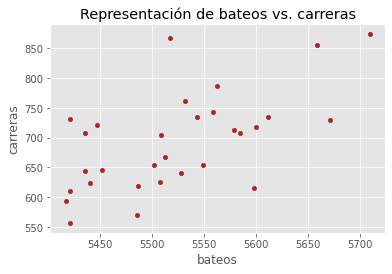

In [41]:
# Gráfica bateos vs. carreras
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))

datos.plot(
    x    = 'bateos',
    y    = 'carreras',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Representación de bateos vs. carreras');

In [42]:
# División de los datos en train y test
# ==============================================================================
X = datos[['bateos']]
y = datos['carreras']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [44]:
# Creación del modelo utilizando el modo fórmula (parecido a la forma de hacerlo en R)
# ==============================================================================
datos_train = pd.DataFrame(np.hstack((X_train, y_train)), columns=['bateos', 'carreras'])
modelo = smf.ols(formula = 'carreras ~bateos', data = datos_train)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:               carreras   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     8.191
Date:                Thu, 23 Dec 2021   Prob (F-statistic):            0.00906
Time:                        23:30:09   Log-Likelihood:                -134.71
No. Observations:                  24   AIC:                             273.4
Df Residuals:                      22   BIC:                             275.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2367.7028   1066.357     -2.220      0.0

Referencia: Amat R. (2021). Estadistica-machine-learning-python. https://github.com/JoaquinAmatRodrigo/Estadistica-machine-learning-python#estadistica-machine-learning-python. 